# Speak Italian

In [1]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import re
import numpy as np

dataset_path = 'dataset'

## Data Analysis

### Dataset

Merge all .csv files to create the dataset. Each of them contains the landmarks that represent the gestures made by the same user

In [2]:
df = pd.DataFrame()

for file in os.listdir(dataset_path):
    if file.endswith('csv'):
        df_tmp = pd.read_csv(os.path.join(dataset_path, file), index_col=0)
        df = pd.concat([df, df_tmp], ignore_index=True)

df.rename(columns={'class': 'label'}, inplace=True)
dataset = df
dataset

WRIST_x   WRIST_y       WRIST_z  THUMB_CMC_x  THUMB_CMC_y  \
0      0.990714  0.903487 -3.851217e-08     1.000000     0.652842   
1      1.000000  0.915750 -1.946796e-07     0.956233     0.645192   
2      1.000000  0.928520 -3.295535e-07     0.945961     0.653159   
3      1.000000  0.921801 -3.416273e-07     0.942021     0.650385   
4      1.000000  0.913477 -2.984952e-07     0.938711     0.644351   
...         ...       ...           ...          ...          ...   
39995  0.334922  1.000000  8.497814e-09     0.654696     0.891156   
39996  0.324606  1.000000  3.204600e-08     0.643987     0.904994   
39997  0.341455  1.000000  9.975268e-08     0.643793     0.906098   
39998  0.350266  1.000000  6.148967e-08     0.670707     0.894131   
39999  0.349887  1.000000  6.247902e-08     0.678920     0.897595   

       THUMB_CMC_z  THUMB_MCP_x  THUMB_MCP_y  THUMB_MCP_z  THUMBJP_x  ...  \
0        -0.032994     0.840578     0.376096    -0.061571   0.689398  ...   
1        -0.017305     0.768040     0.379923    -0.048313   0.630781  ...   
2        -0.012282     0.759569     0.384133    -0.040607   0.622480  ...   
3        -0.011439     0.753529     0.385286    -0.040159   0.615985  ...   
4        -0.011435     0.751100     0.381470    -0.040908   0.615120  ...   
...            ...          ...          ...          ...        ...  ...   
39995    -0.022789     0.882842     0.748874    -0.043806   1.000000  ...   
39996    -0.025947     0.882119     0.761357    -0.047619   1.000000  ...   
39997    -0.028478     0.872508     0.768961    -0.052514   1.000000  ...   
39998    -0.024447     0.891838     0.752296    -0.046299   1.000000  ...   
39999    -0.024561     0.901249     0.752686    -0.044474   1.000000  ...   

       PINKY_PIP_x  PINKY_PIP_y  PINKY_PIP_z  PINKY_DIP_x  PINKY_DIP_y  \
0         0.070598     0.920565    -0.098152     0.169450     0.912454   
1         0.065075     0.915304    -0.131499     0.186017     0.926668   
2         0.062635     0.919084    -0.136837     0.179498     0.926989   
3         0.053601     0.922249    -0.138441     0.170006     0.931379   
4         0.055661     0.911974    -0.136061     0.169151     0.919589   
...            ...          ...          ...          ...          ...   
39995     0.037901     0.437459    -0.098323     0.201521     0.512731   
39996     0.038579     0.441735    -0.101655     0.208133     0.524582   
39997     0.022157     0.446335    -0.102182     0.198400     0.519740   
39998     0.027055     0.428198    -0.096626     0.197438     0.499081   
39999     0.031973     0.430894    -0.087377     0.191894     0.508130   

       PINKY_DIP_z  PINKY_TIP_x  PINKY_TIP_y  PINKY_TIP_z          label  
0        -0.081150     0.315971     0.930628    -0.064982  thumbUp_right  
1        -0.106291     0.327319     0.952869    -0.087645  thumbUp_right  
2        -0.110128     0.318699     0.952274    -0.090388  thumbUp_right  
3        -0.110805     0.305764     0.955842    -0.090750  thumbUp_right  
4        -0.106736     0.303544     0.947275    -0.085968  thumbUp_right  
...            ...          ...          ...          ...            ...  
39995    -0.087034     0.255991     0.610343    -0.070552     index_left  
39996    -0.090344     0.265345     0.624646    -0.072881     index_left  
39997    -0.091423     0.268122     0.615092    -0.074284     index_left  
39998    -0.085471     0.258852     0.596428    -0.068904     index_left  
39999    -0.075717     0.249103     0.605687    -0.058114     index_left  

[40000 rows x 64 columns]

All attributes in the dataset are numerical

* 40.000 total instances
* 63 features per instance (21 points in 3D space)

Split the whole dataset in X (data instances) and y (labels)

In [3]:
X, y = dataset.loc[:, ~dataset.columns.isin(['label'])], dataset['label']
n_samples = X.shape[0]
n_features = dataset.shape[1]
labels = list(y.unique())

In [4]:
dataset.describe()

WRIST_x       WRIST_y       WRIST_z   THUMB_CMC_x   THUMB_CMC_y  \
count  40000.000000  40000.000000  4.000000e+04  40000.000000  40000.000000   
mean       0.492526      0.890649 -6.400215e-09      0.487814      0.768803   
std        0.382229      0.240747  5.354025e-07      0.295019      0.169908   
min        0.000000      0.000000 -1.237358e-06      0.000000      0.114005   
25%        0.114131      0.905145 -4.171551e-07      0.222519      0.637567   
50%        0.481098      1.000000 -1.557508e-07      0.495956      0.860823   
75%        0.911295      1.000000  4.483064e-07      0.758828      0.898791   
max        1.000000      1.000000  1.662309e-06      1.000000      1.000000   

        THUMB_CMC_z   THUMB_MCP_x   THUMB_MCP_y   THUMB_MCP_z     THUMBJP_x  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean      -0.016971      0.484699      0.600083     -0.029961      0.487129   
std        0.016787      0.314785      0.157886      0.021458      0.317281   
min       -0.081310      0.000000      0.000000     -0.131633      0.000000   
25%       -0.028121      0.201091      0.415474     -0.041689      0.184747   
50%       -0.017372      0.497523      0.657793     -0.028935      0.469382   
75%       -0.005722      0.751249      0.719031     -0.016561      0.807783   
max        0.080103      1.000000      1.000000      0.094243      1.000000   

       ...   PINKY_MCP_z   PINKY_PIP_x   PINKY_PIP_y   PINKY_PIP_z  \
count  ...  40000.000000  40000.000000  40000.000000  40000.000000   
mean   ...     -0.048028      0.497330      0.509488     -0.065459   
std    ...      0.028452      0.372863      0.328058      0.032431   
min    ...     -0.166516      0.000000      0.000000     -0.197845   
25%    ...     -0.064005      0.107623      0.287881     -0.088794   
50%    ...     -0.042850      0.499547      0.424600     -0.062537   
75%    ...     -0.027705      0.879460      0.908116     -0.043197   
max    ...      0.075918      1.000000      1.000000      0.106452   

        PINKY_DIP_x   PINKY_DIP_y   PINKY_DIP_z   PINKY_TIP_x   PINKY_TIP_y  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.495245      0.518078     -0.057358      0.496304      0.510872   
std        0.331004      0.333207      0.035021      0.330684      0.359381   
min        0.000000      0.000000     -0.202784      0.000000      0.000000   
25%        0.184551      0.239069     -0.082450      0.204642      0.154723   
50%        0.479552      0.442641     -0.054378      0.487103      0.513966   
75%        0.813459      0.898604     -0.032227      0.770630      0.890490   
max        1.000000      1.000000      0.137856      1.000000      1.000000   

        PINKY_TIP_z  
count  40000.000000  
mean      -0.046733  
std        0.038365  
min       -0.220696  
25%       -0.071441  
50%       -0.045794  
75%       -0.016683  
max        0.145454  

[8 rows x 63 columns]

### Class Frequency (Histogram)

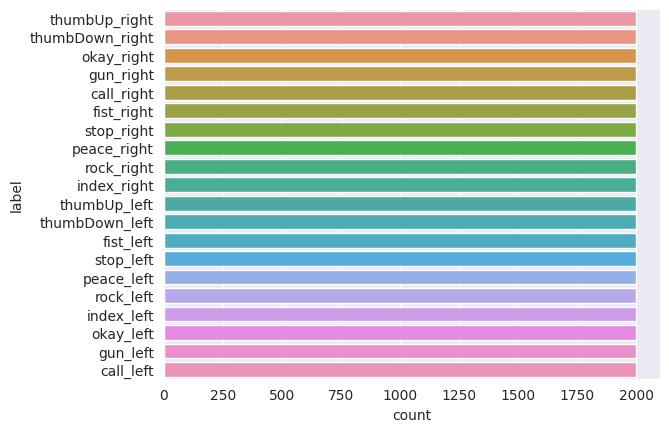

In [6]:
import seaborn as sns

sns.countplot(data=dataset, y="label")
filename = 'countplot_'+str(len(labels))+'_classes.png'
plt.savefig('documentation/plot/'+filename, transparent=True, bbox_inches='tight')

Dataset is perfectly banlanced:
* 10 Gestures
* 20 classes (for each gesture, 2 classes: one for right hand and one for left hand)
* 2000 instances for each class

### Data Visualization (Histogram)

Plot the histogram for each attribute to see the frequency of all possible values

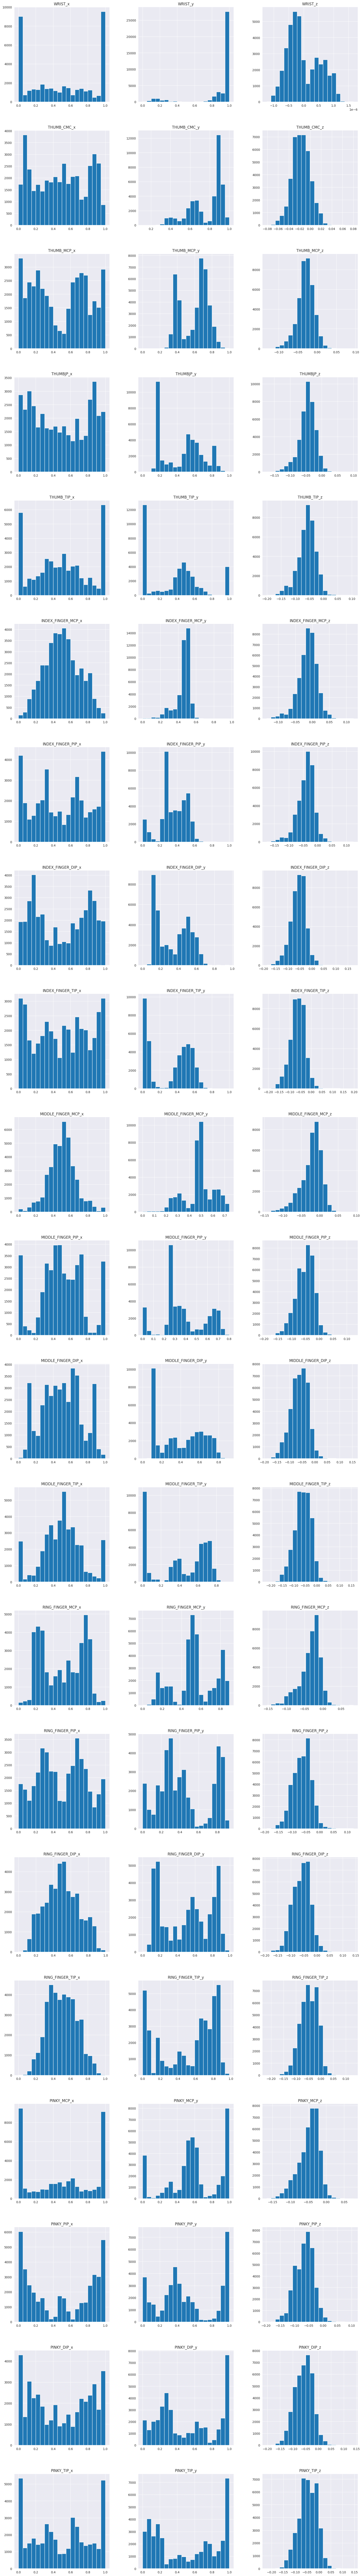

In [ ]:
X.hist(bins=20, figsize=(20,150), layout=(21,3))
filename = "histogram_"+str(len(labels))+"_classes.png"
plt.savefig('documentation/plot/'+filename)

Notice that all attributes that represent the z point of a landmark have similar behaviour among all gestures. Let's plot only those attributes to highlight this


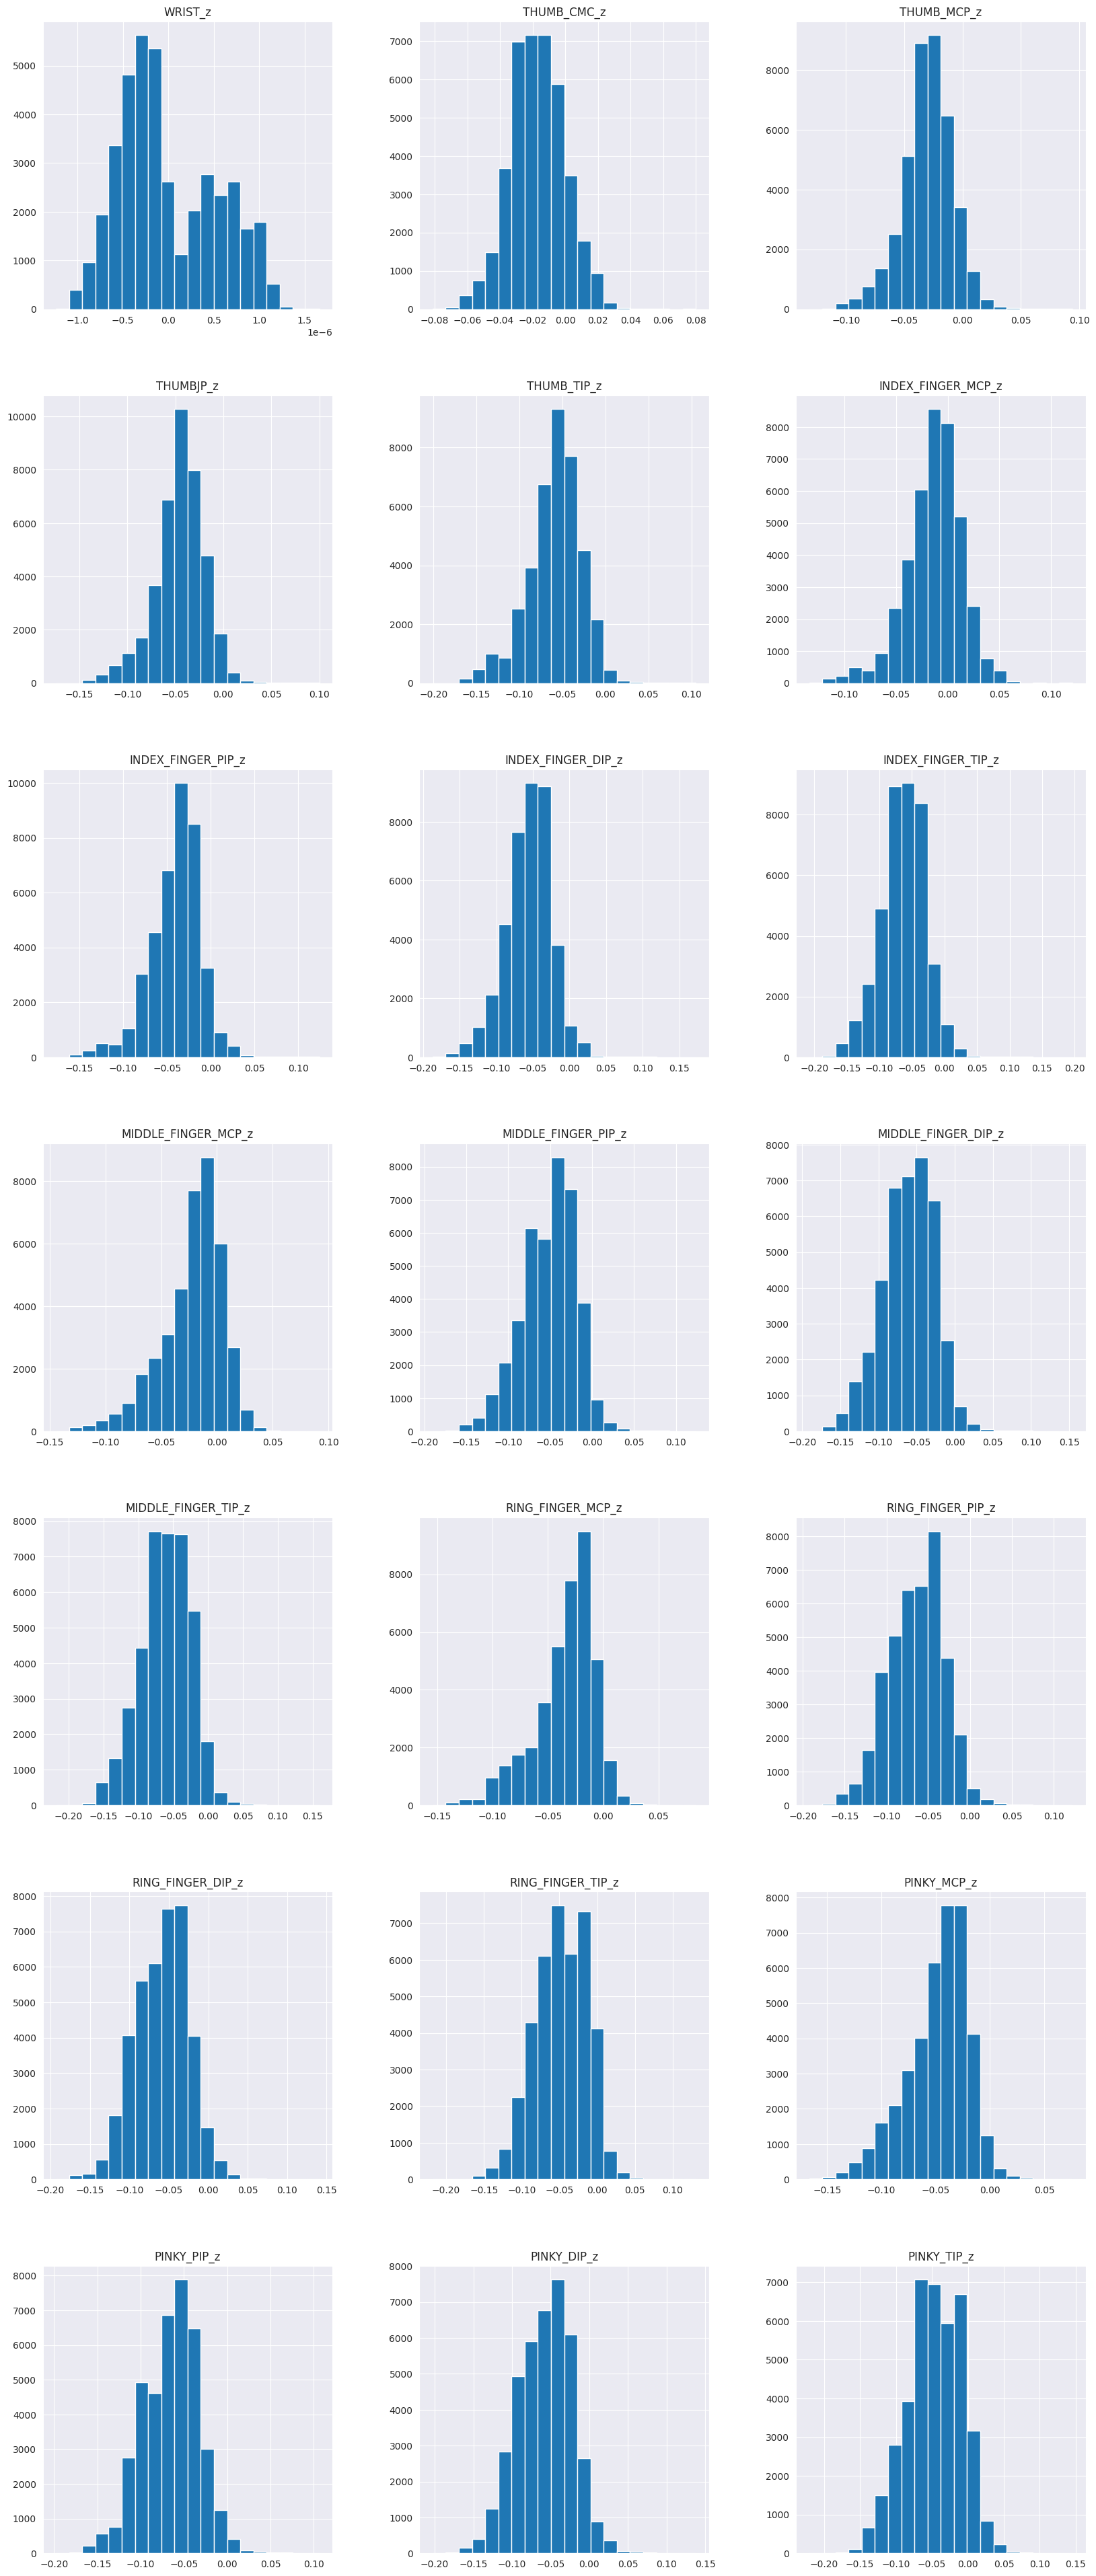

In [8]:
X[[c for c in X.columns if c.endswith('z')]].hist(bins=20, figsize=(20,150), layout=(21,3))


filename = "z_histogram_"+str(len(labels))+"_classes.png"
plt.savefig('documentation/plot/'+filename, transparent=True, bbox_inches='tight')

For all points the z-coordinate seems to follow the normal distribution. This suggests that they are less significant. Let's dimostrate this setting a low Variance Threshold.

In [9]:
from sklearn.feature_selection import VarianceThreshold

fsel = VarianceThreshold(threshold = 0.002)  # the attributes whose variance is greater than the threshold
fsel.fit_transform(X) # display just the first ten rows

X.columns[~fsel.get_support(indices=False)]

Index(['WRIST_z', 'THUMB_CMC_z', 'THUMB_MCP_z', 'THUMBJP_z', 'THUMB_TIP_z',
       'INDEX_FINGER_MCP_z', 'INDEX_FINGER_PIP_z', 'INDEX_FINGER_DIP_z',
       'INDEX_FINGER_TIP_z', 'MIDDLE_FINGER_MCP_z', 'MIDDLE_FINGER_PIP_z',
       'MIDDLE_FINGER_DIP_z', 'MIDDLE_FINGER_TIP_z', 'RING_FINGER_MCP_z',
       'RING_FINGER_PIP_z', 'RING_FINGER_DIP_z', 'RING_FINGER_TIP_z',
       'PINKY_MCP_z', 'PINKY_PIP_z', 'PINKY_DIP_z', 'PINKY_TIP_z'],
      dtype='object')

### Data Visualization (Boxplot)

In [ ]:
dataset.boxplot(column=list(X.columns), by='label', layout=(21,3), figsize=(50,400))
filename = "boxplot_"+str(len(labels))+"_classes.png"
plt.savefig('documentation/plot/'+filename)
plt.show()

### Dimensionality Reduction (PCA)

We use Principal Component Analysis as a preliminar analysis to find the components with the highest variance.

We will use the PCA in pipelines in the following sections.

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
pca.fit(X.iloc[:32000])
X_reduced = pca.transform(X)
print("Number of components: ", X_reduced.shape[1])
print("Variance of components: ", pca.explained_variance_ratio_)

Number of components:  10
Variance of components:  [0.29035592 0.28255453 0.17441236 0.05333261 0.03915906 0.03266881
 0.02841955 0.02479733 0.01653466 0.01597959]


The PCA returns a set of 10 components

### Data Visualization after Dimensionality Reduction

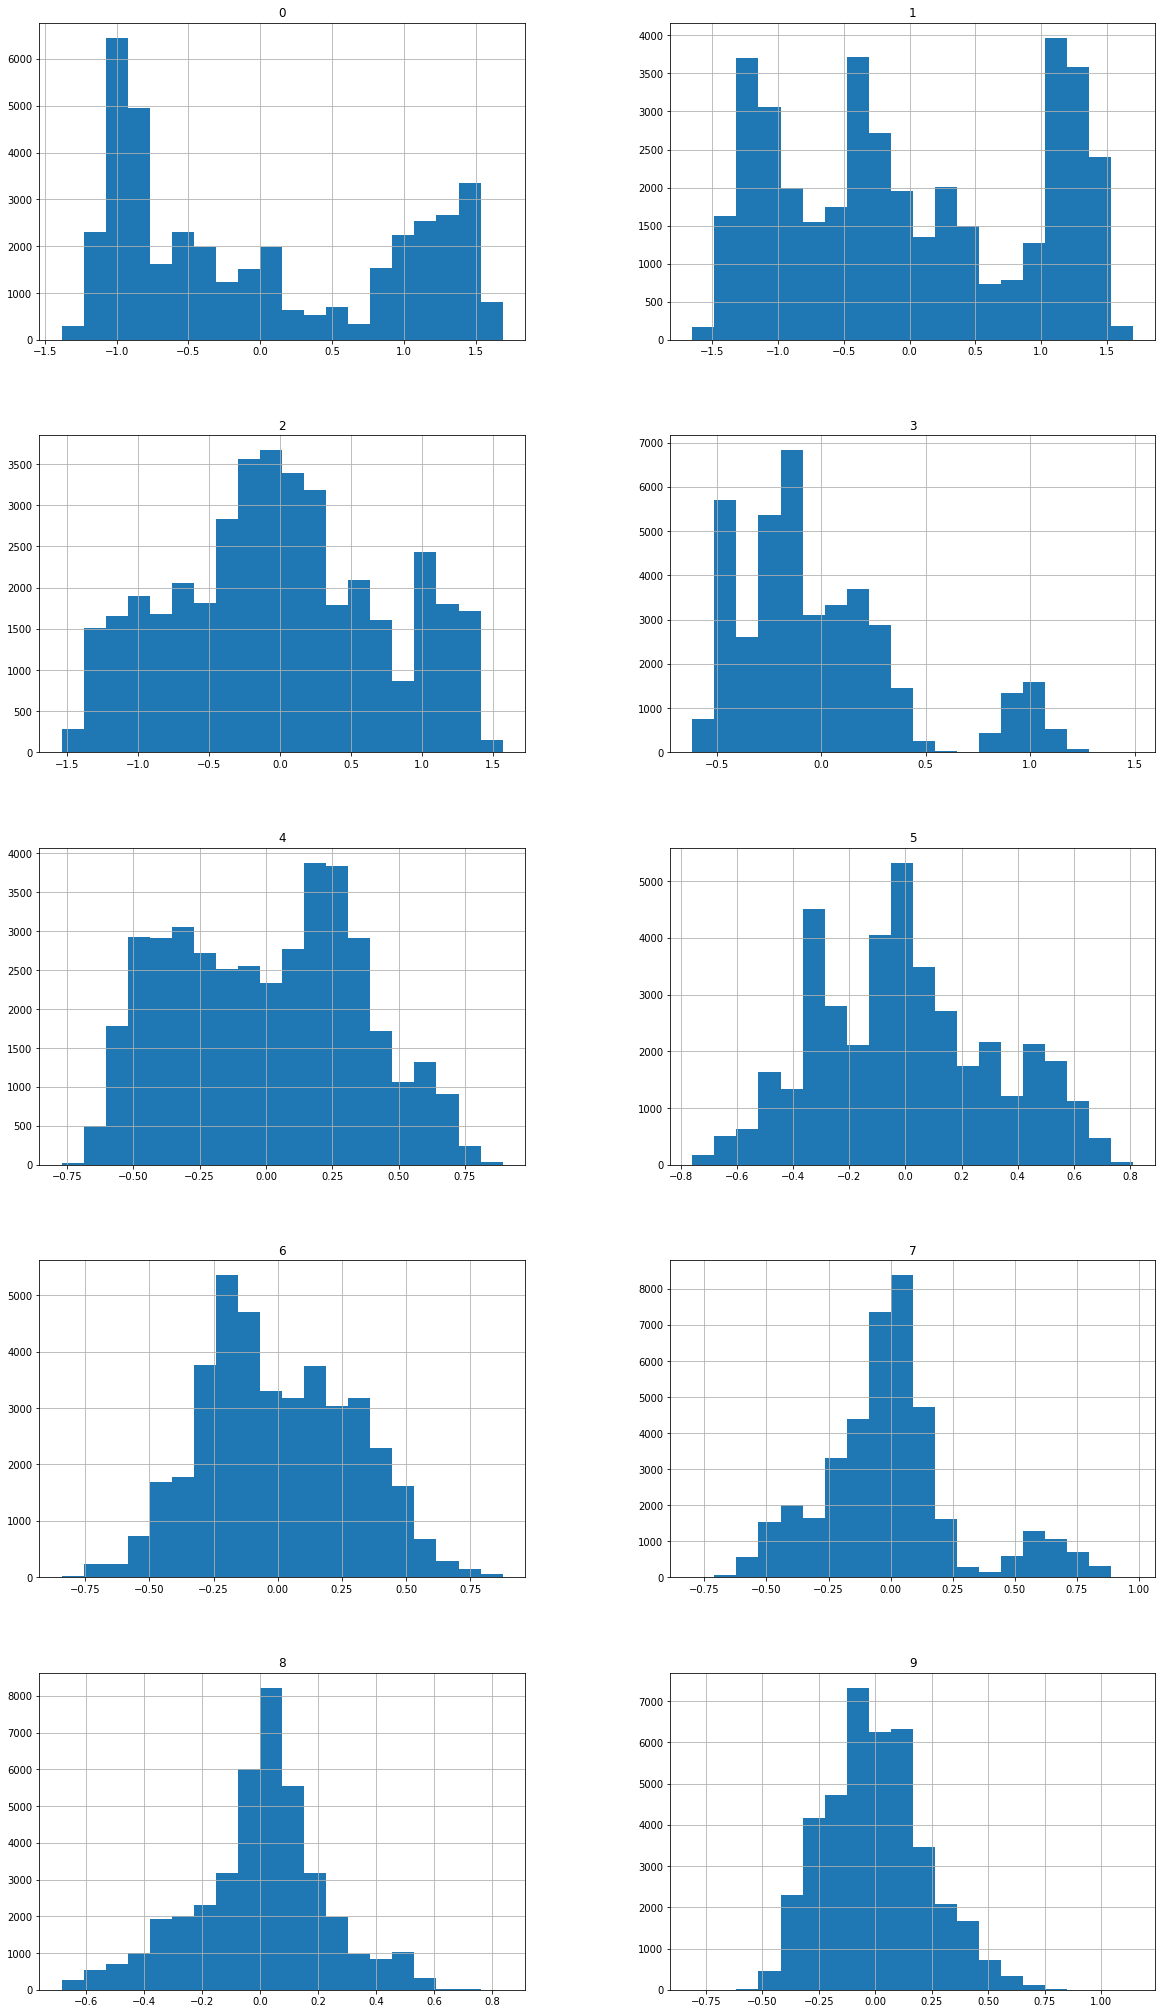

In [ ]:
pd.DataFrame(X_reduced).hist(bins=20, figsize=(20,150), layout=(20,2));

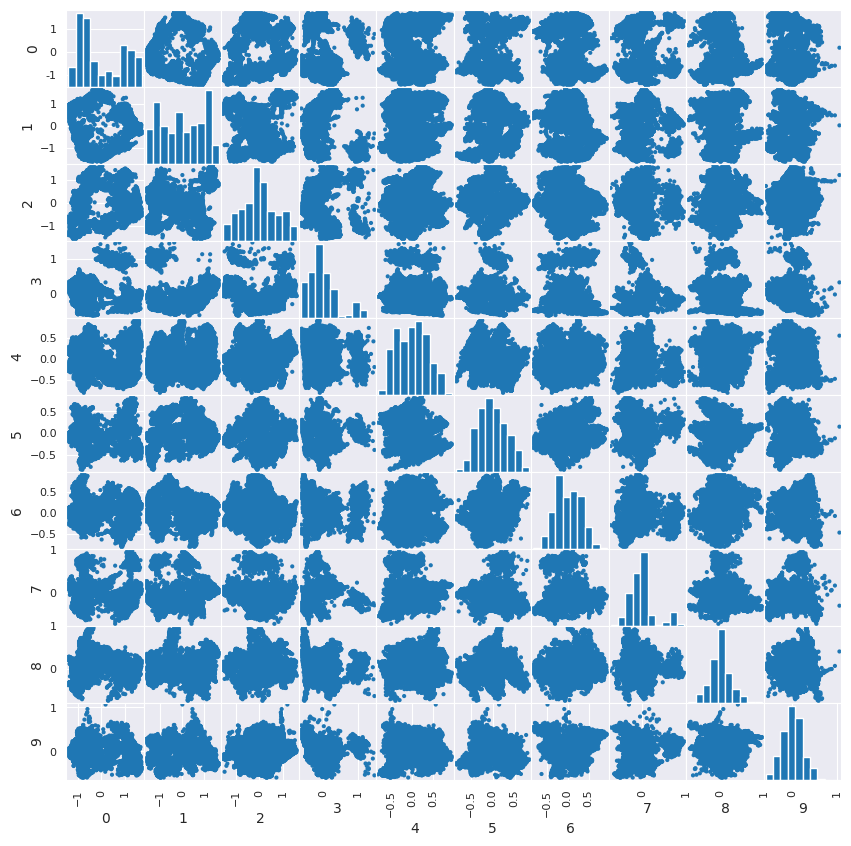

In [13]:
from pandas.plotting import scatter_matrix

scatter_matrix(pd.DataFrame(X_reduced), alpha=1, figsize=(10,10))
filename = "scatter_matrix_pca"+str(len(labels))+"_classes.png"
plt.savefig('documentation/plot/'+filename, transparent=True, bbox_inches='tight')
plt.show()

## Classification

### Train and test a classifier (using StratifiedKFold validation)

We create a function that performs the classification process using a pipeline composed by:
* PCA (as feature selection method)
* Stratified K-Fold Cross Validation
  * We choose $k=5$ in such a way to have all the gestures of a user inside the same fold
  * In this way we have 8 users for train and 2 users for test
* A classifier given in input

This function returns a dictionary that store the following information:
* list_accuracy: accuracies for each fold
* accuracy_avg: mean of list_accuracy
* df_avg: average of all metrics for each fold
* time_elapsed: both for train and test
* confusion_matrix: only of the last fold

In [16]:
import time
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
import pickle as pk

classifier_comparison = {}

def create_classifier(classifier, show=False, save=False):

    skf = StratifiedKFold(n_splits=5)

    pipe = make_pipeline(PCA(n_components=0.95), classifier)

    list_df = []
    list_accuracy = []
    training_time = []
    test_time = []
    cm = []

    k = 1

    for train, val in skf.split(X, y):

        # fit and predict using pipeline
        X_tr = X.iloc[train]
        y_tr = y.iloc[train]
        X_val = X.iloc[val]
        y_val = y.iloc[val]

        #train model
        start_time = time.time()
        pipe.fit(X_tr,y_tr)
        training_time.append(time.time() - start_time)

        #test model
        start_time = time.time()
        y_pred = pipe.predict(X_val)
        test_time.append(time.time() - start_time)

        # compute classification report
        cr = classification_report(y_val, y_pred, output_dict = True)
        cm = confusion_matrix(y_val, y_pred)

        if show:
            print(f'FOLD {k}')
            print(classification_report(y_val,y_pred))
        # store accuracy
        list_accuracy.append(cr['accuracy'])
        # store per-class metrics as a dataframe
        df = pd.DataFrame({k:v for k,v in cr.items() if k!='accuracy'})
        if show:
            display(df)
        list_df.append(df)
        k+=1

    elapsed_time = {}
    elapsed_time['train'] = np.mean(np.array(training_time))
    elapsed_time['test'] = np.mean(np.array(test_time))


    # compute average per-class metrics
    df_concat = pd.concat(list_df)
    grouped_by_row_index = df_concat.groupby(df_concat.index)
    df_avg = grouped_by_row_index.mean()

    # compute average accuracy
    accuracy_avg = np.mean(list_accuracy)

    if save:
      pk.dump(model, open('model/pipeline.sav', 'wb'))

    return {'accuracy_avg': accuracy_avg, 'accuracies': list_accuracy, 'df_avg': df_avg, 'time_elapsed': elapsed_time, 'confusion_matrix': cm}



def display_confusion_matrix(matrix, filename):
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=labels)
    fig, ax = plt.subplots(figsize=(10,10))
    cm_display.plot(ax=ax)
    plt.xticks(rotation=60)
    plt.savefig('documentation/plot/'+filename, transparent=True, bbox_inches='tight')
    plt.show()

### kNN Hyperparameter Selection

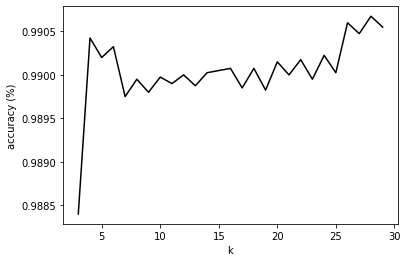

In [36]:
from sklearn.neighbors import KNeighborsClassifier

n_iterations = 10
range_k = range(3,30)
knn_comparison = {}
for k in range_k:
    model = KNeighborsClassifier(n_neighbors=k)
    knn_comparison[k] = create_classifier(model)

plt.plot(range_k, [knn_comparison[x]['accuracy_avg'] for x in range_k], color="k")  
plt.xlabel('k')
plt.ylabel('accuracy (%)')

filename = "comparison_kNN_"+str(len(labels))+"_classes.png"
plt.savefig('documentation/plot/'+filename, transparent=True, bbox_inches='tight')
plt.show()

### Random Forest Hyperparameter Selection

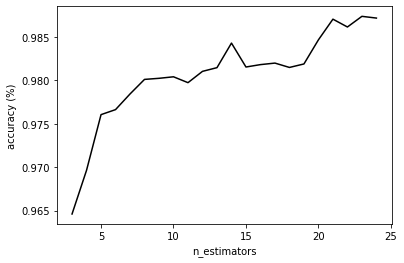

In [22]:
from sklearn.ensemble import RandomForestClassifier

range_k = range(3, 25)
rf_comparison = {}
for k in range_k:
    model = RandomForestClassifier(n_estimators=k, random_state=0)
    rf_comparison[k] = create_classifier(model)

plt.plot(range_k, [rf_comparison[x]['accuracy_avg'] for x in range_k], color="k")  
plt.xlabel('n_estimators')
plt.ylabel('accuracy (%)')

filename = "comparison_RF_"+str(len(labels))+"_classes.png"
plt.savefig('documentation/plot/'+filename, transparent=True, bbox_inches='tight')
plt.show()

### Naive Bayesian Classifier

FOLD 1
                 precision    recall  f1-score   support

      call_left       1.00      1.00      1.00       400
     call_right       1.00      0.98      0.99       400
      fist_left       1.00      1.00      1.00       400
     fist_right       1.00      1.00      1.00       400
       gun_left       1.00      1.00      1.00       400
      gun_right       1.00      1.00      1.00       400
     index_left       1.00      0.91      0.95       400
    index_right       1.00      1.00      1.00       400
      okay_left       1.00      1.00      1.00       400
     okay_right       1.00      0.99      1.00       400
     peace_left       0.92      1.00      0.96       400
    peace_right       1.00      1.00      1.00       400
      rock_left       1.00      1.00      1.00       400
     rock_right       1.00      1.00      1.00       400
      stop_left       1.00      1.00      1.00       400
     stop_right       1.00      1.00      1.00       400
 thumbDown_left       1

call_left  call_right   fist_left  fist_right    gun_left  \
precision    1.000000    0.997449    1.000000         1.0    1.000000   
recall       0.997500    0.977500    0.997500         1.0    0.997500   
f1-score     0.998748    0.987374    0.998748         1.0    0.998748   
support    400.000000  400.000000  400.000000       400.0  400.000000   

           gun_right  index_left  index_right  okay_left  okay_right  ...  \
precision        1.0    1.000000     1.000000        1.0    1.000000  ...   
recall           1.0    0.912500     0.997500        1.0    0.995000  ...   
f1-score         1.0    0.954248     0.998748        1.0    0.997494  ...   
support        400.0  400.000000   400.000000      400.0  400.000000  ...   

           rock_left  rock_right  stop_left  stop_right  thumbDown_left  \
precision        1.0         1.0        1.0    0.995025        1.000000   
recall           1.0         1.0        1.0    1.000000        0.997500   
f1-score         1.0         1.0        1.0    0.997506        0.998748   
support        400.0       400.0      400.0  400.000000      400.000000   

           thumbDown_right  thumbUp_left  thumbUp_right    macro avg  \
precision              1.0      0.992556       0.977941     0.993877   
recall                 1.0      1.000000       0.997500     0.993500   
f1-score               1.0      0.996264       0.987624     0.993492   
support              400.0    400.000000     400.000000  8000.000000   

           weighted avg  
precision      0.993877  
recall         0.993500  
f1-score       0.993492  
support     8000.000000  

[4 rows x 22 columns]

FOLD 2
                 precision    recall  f1-score   support

      call_left       0.99      1.00      0.99       400
     call_right       0.99      1.00      1.00       400
      fist_left       1.00      1.00      1.00       400
     fist_right       0.99      1.00      1.00       400
       gun_left       1.00      0.99      1.00       400
      gun_right       1.00      1.00      1.00       400
     index_left       1.00      0.99      1.00       400
    index_right       0.99      0.99      0.99       400
      okay_left       1.00      1.00      1.00       400
     okay_right       0.85      1.00      0.92       400
     peace_left       1.00      1.00      1.00       400
    peace_right       1.00      1.00      1.00       400
      rock_left       1.00      1.00      1.00       400
     rock_right       1.00      1.00      1.00       400
      stop_left       1.00      1.00      1.00       400
     stop_right       1.00      0.82      0.90       400
 thumbDown_left       1

call_left  call_right   fist_left  fist_right    gun_left  \
precision    0.987654    0.990099    0.997506    0.990099    1.000000   
recall       1.000000    1.000000    1.000000    1.000000    0.995000   
f1-score     0.993789    0.995025    0.998752    0.995025    0.997494   
support    400.000000  400.000000  400.000000  400.000000  400.000000   

            gun_right  index_left  index_right  okay_left  okay_right  ...  \
precision    1.000000    1.000000         0.99        1.0    0.845666  ...   
recall       0.997500    0.995000         0.99        1.0    1.000000  ...   
f1-score     0.998748    0.997494         0.99        1.0    0.916380  ...   
support    400.000000  400.000000       400.00      400.0  400.000000  ...   

           rock_left  rock_right  stop_left  stop_right  thumbDown_left  \
precision        1.0         1.0        1.0    1.000000             1.0   
recall           1.0         1.0        1.0    0.817500             1.0   
f1-score         1.0         1.0        1.0    0.899587             1.0   
support        400.0       400.0      400.0  400.000000           400.0   

           thumbDown_right  thumbUp_left  thumbUp_right    macro avg  \
precision         1.000000      0.997475       1.000000     0.989800   
recall            0.997500      0.987500       0.987500     0.988375   
f1-score          0.998748      0.992462       0.993711     0.988298   
support         400.000000    400.000000     400.000000  8000.000000   

           weighted avg  
precision      0.989800  
recall         0.988375  
f1-score       0.988298  
support     8000.000000  

[4 rows x 22 columns]

FOLD 3
                 precision    recall  f1-score   support

      call_left       1.00      0.99      0.99       400
     call_right       1.00      1.00      1.00       400
      fist_left       1.00      1.00      1.00       400
     fist_right       1.00      1.00      1.00       400
       gun_left       1.00      1.00      1.00       400
      gun_right       1.00      1.00      1.00       400
     index_left       1.00      1.00      1.00       400
    index_right       0.99      0.99      0.99       400
      okay_left       1.00      1.00      1.00       400
     okay_right       1.00      1.00      1.00       400
     peace_left       1.00      0.99      1.00       400
    peace_right       1.00      1.00      1.00       400
      rock_left       1.00      1.00      1.00       400
     rock_right       0.99      1.00      1.00       400
      stop_left       1.00      1.00      1.00       400
     stop_right       1.00      1.00      1.00       400
 thumbDown_left       1

call_left  call_right  fist_left  fist_right    gun_left  \
precision    1.000000         1.0        1.0         1.0    1.000000   
recall       0.990000         1.0        1.0         1.0    0.997500   
f1-score     0.994975         1.0        1.0         1.0    0.998748   
support    400.000000       400.0      400.0       400.0  400.000000   

            gun_right  index_left  index_right  okay_left  okay_right  ...  \
precision    1.000000    0.997506     0.994987        1.0         1.0  ...   
recall       0.997500    1.000000     0.992500        1.0         1.0  ...   
f1-score     0.998748    0.998752     0.993742        1.0         1.0  ...   
support    400.000000  400.000000   400.000000      400.0       400.0  ...   

           rock_left  rock_right  stop_left  stop_right  thumbDown_left  \
precision        1.0    0.992556        1.0         1.0             1.0   
recall           1.0    1.000000        1.0         1.0             1.0   
f1-score         1.0    0.996264        1.0         1.0             1.0   
support        400.0  400.000000      400.0       400.0           400.0   

           thumbDown_right  thumbUp_left  thumbUp_right    macro avg  \
precision              1.0      0.990099            1.0     0.998633   
recall                 1.0      1.000000            1.0     0.998625   
f1-score               1.0      0.995025            1.0     0.998625   
support              400.0    400.000000          400.0  8000.000000   

           weighted avg  
precision      0.998633  
recall         0.998625  
f1-score       0.998625  
support     8000.000000  

[4 rows x 22 columns]

FOLD 4
                 precision    recall  f1-score   support

      call_left       1.00      0.98      0.99       400
     call_right       0.98      0.98      0.98       400
      fist_left       0.98      0.97      0.98       400
     fist_right       0.93      1.00      0.96       400
       gun_left       1.00      0.94      0.97       400
      gun_right       1.00      0.99      1.00       400
     index_left       0.97      0.99      0.98       400
    index_right       0.99      0.90      0.94       400
      okay_left       1.00      0.98      0.99       400
     okay_right       1.00      1.00      1.00       400
     peace_left       1.00      0.99      0.99       400
    peace_right       0.89      1.00      0.94       400
      rock_left       1.00      0.99      1.00       400
     rock_right       1.00      0.99      0.99       400
      stop_left       0.99      1.00      0.99       400
     stop_right       1.00      1.00      1.00       400
 thumbDown_left       1

call_left  call_right   fist_left  fist_right    gun_left  \
precision    1.000000    0.984925    0.982323    0.927907    1.000000   
recall       0.985000    0.980000    0.972500    0.997500    0.942500   
f1-score     0.992443    0.982456    0.977387    0.961446    0.970399   
support    400.000000  400.000000  400.000000  400.000000  400.000000   

            gun_right  index_left  index_right   okay_left  okay_right  ...  \
precision    1.000000    0.968293     0.986301    1.000000         1.0  ...   
recall       0.992500    0.992500     0.900000    0.982500         1.0  ...   
f1-score     0.996236    0.980247     0.941176    0.991173         1.0  ...   
support    400.000000  400.000000   400.000000  400.000000       400.0  ...   

            rock_left  rock_right   stop_left  stop_right  thumbDown_left  \
precision    1.000000    1.000000    0.987654         1.0        1.000000   
recall       0.995000    0.990000    1.000000         1.0        0.992500   
f1-score     0.997494    0.994975    0.993789         1.0        0.996236   
support    400.000000  400.000000  400.000000       400.0      400.000000   

           thumbDown_right  thumbUp_left  thumbUp_right    macro avg  \
precision         0.992556      0.984925       1.000000     0.985090   
recall            1.000000      0.980000       0.990000     0.984125   
f1-score          0.996264      0.982456       0.994975     0.984210   
support         400.000000    400.000000     400.000000  8000.000000   

           weighted avg  
precision      0.985090  
recall         0.984125  
f1-score       0.984210  
support     8000.000000  

[4 rows x 22 columns]

FOLD 5
                 precision    recall  f1-score   support

      call_left       1.00      0.99      0.99       400
     call_right       0.96      0.96      0.96       400
      fist_left       0.98      0.98      0.98       400
     fist_right       1.00      1.00      1.00       400
       gun_left       1.00      0.99      1.00       400
      gun_right       1.00      1.00      1.00       400
     index_left       0.96      1.00      0.98       400
    index_right       1.00      0.99      0.99       400
      okay_left       0.95      1.00      0.97       400
     okay_right       1.00      1.00      1.00       400
     peace_left       1.00      1.00      1.00       400
    peace_right       1.00      1.00      1.00       400
      rock_left       1.00      0.90      0.94       400
     rock_right       1.00      1.00      1.00       400
      stop_left       1.00      1.00      1.00       400
     stop_right       1.00      1.00      1.00       400
 thumbDown_left       0

call_left  call_right   fist_left  fist_right    gun_left  \
precision    1.000000      0.9575    0.982544         1.0    1.000000   
recall       0.990000      0.9575    0.985000         1.0    0.992500   
f1-score     0.994975      0.9575    0.983770         1.0    0.996236   
support    400.000000    400.0000  400.000000       400.0  400.000000   

           gun_right  index_left  index_right   okay_left  okay_right  ...  \
precision        1.0    0.959233     1.000000    0.947867         1.0  ...   
recall           1.0    1.000000     0.990000    1.000000         1.0  ...   
f1-score         1.0    0.979192     0.994975    0.973236         1.0  ...   
support        400.0  400.000000   400.000000  400.000000       400.0  ...   

            rock_left  rock_right  stop_left  stop_right  thumbDown_left  \
precision    1.000000         1.0        1.0         1.0        0.985222   
recall       0.895000         1.0        1.0         1.0        1.000000   
f1-score     0.944591         1.0        1.0         1.0        0.992556   
support    400.000000       400.0      400.0       400.0      400.000000   

           thumbDown_right  thumbUp_left  thumbUp_right    macro avg  \
precision         1.000000      0.982801       0.957816     0.988649   
recall            0.992500      1.000000       0.965000     0.988375   
f1-score          0.996236      0.991326       0.961395     0.988299   
support         400.000000    400.000000     400.000000  8000.000000   

           weighted avg  
precision      0.988649  
recall         0.988375  
f1-score       0.988299  
support     8000.000000  

[4 rows x 22 columns]

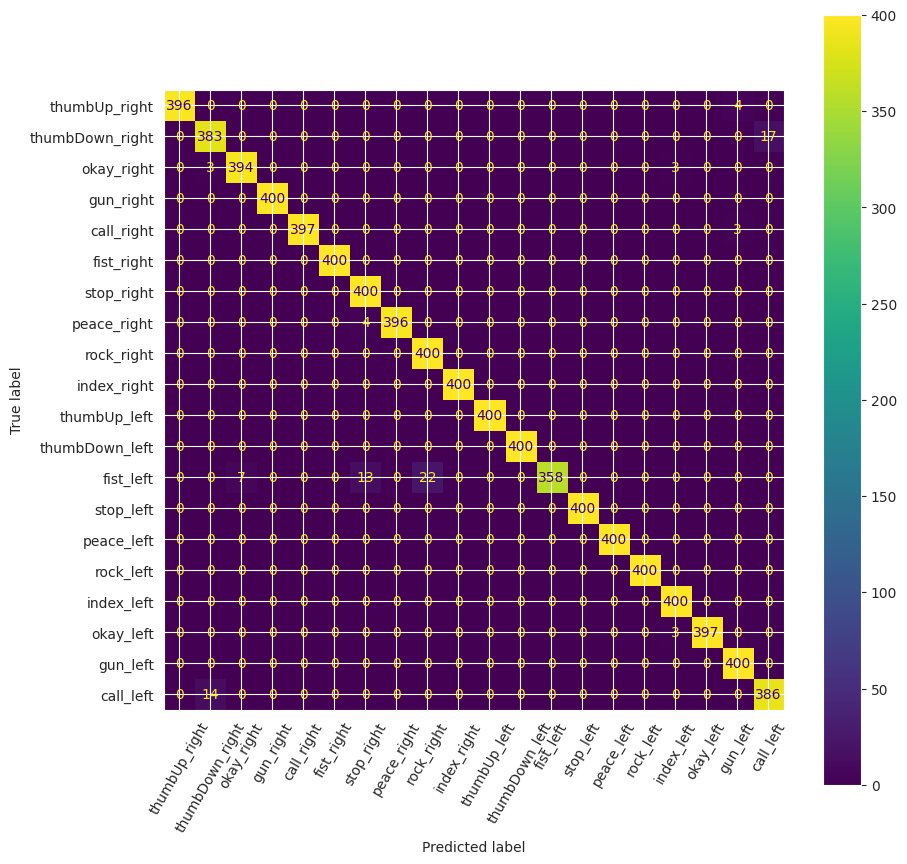

In [17]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
classifier_comparison[str(model)] = create_classifier(model, show=True, save=True)
display_confusion_matrix(classifier_comparison[str(model)]['confusion_matrix'], 'cf_'+str(model))

### Decision Tree Classifier

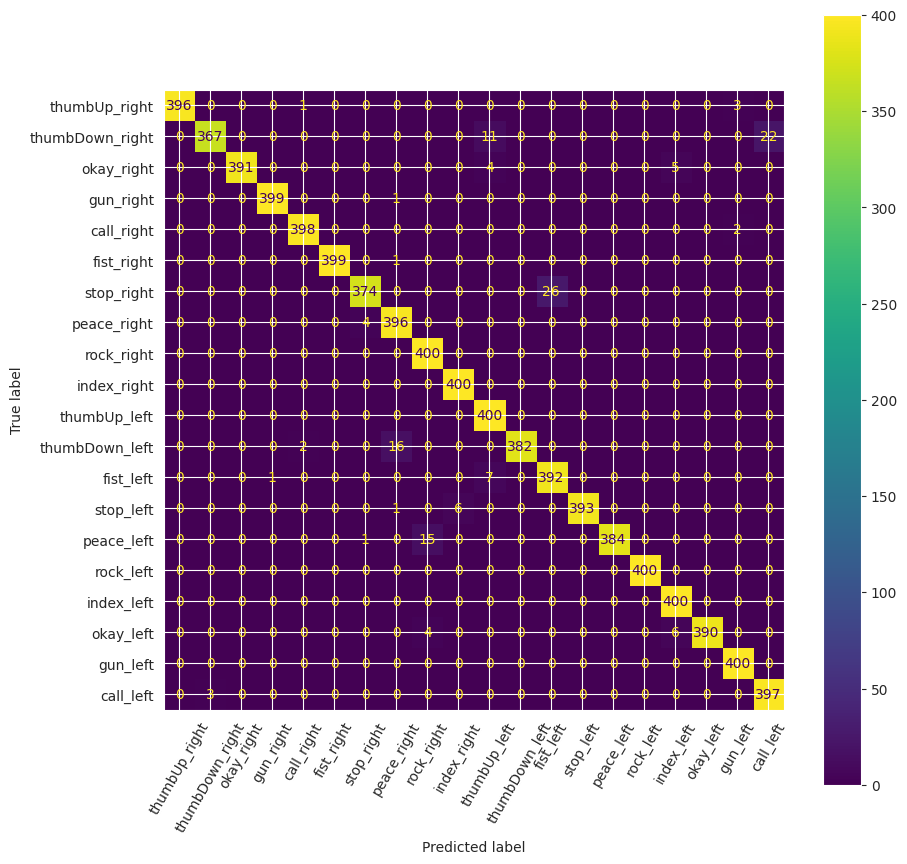

In [18]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=0)
classifier_comparison[str(model)] = create_classifier(model)
display_confusion_matrix(classifier_comparison[str(model)]['confusion_matrix'], 'cf_'+str(model))

### Random Forest Classifier

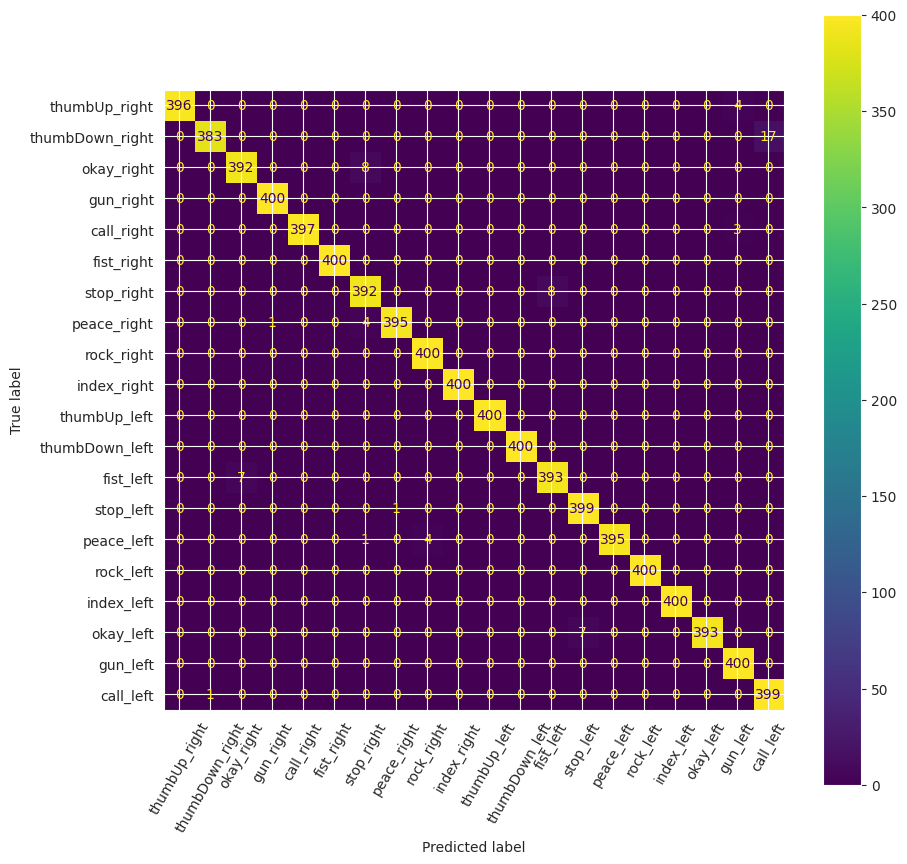

In [19]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=14, random_state=0)
classifier_comparison[str(model)] = create_classifier(model)
display_confusion_matrix(classifier_comparison[str(model)]['confusion_matrix'], 'cf_'+str(model))

### K-NN Classifier

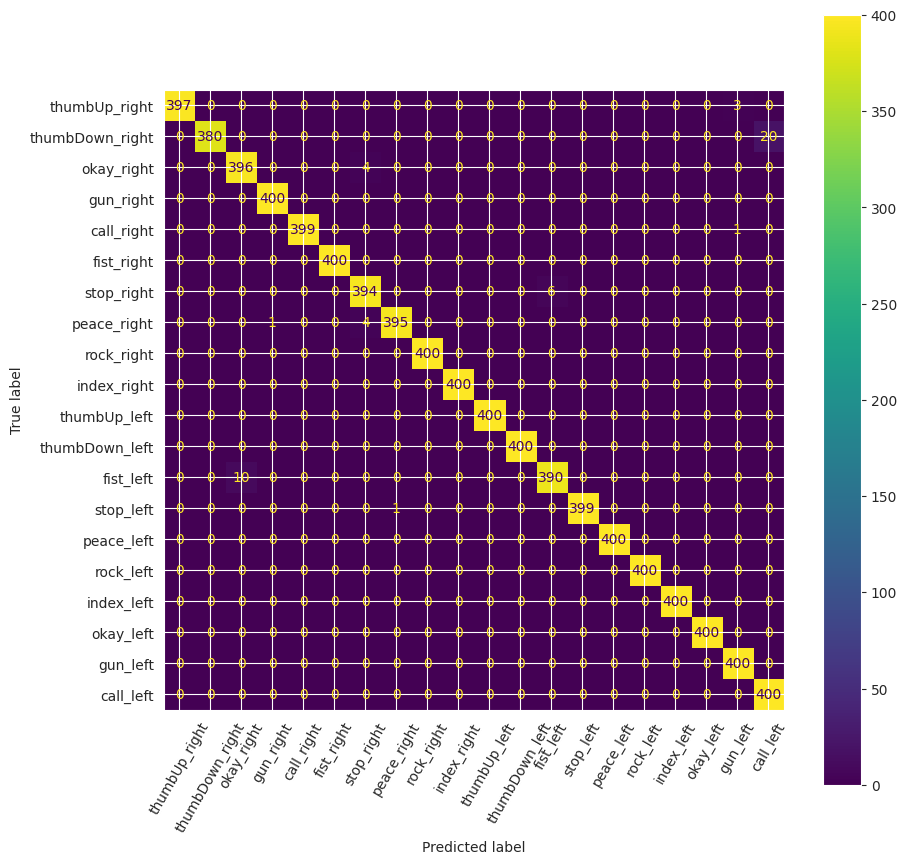

In [20]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=4)
classifier_comparison[str(model)] = create_classifier(model)
display_confusion_matrix(classifier_comparison[str(model)]['confusion_matrix'], 'cf_'+str(model))

### Support Vector Classifier

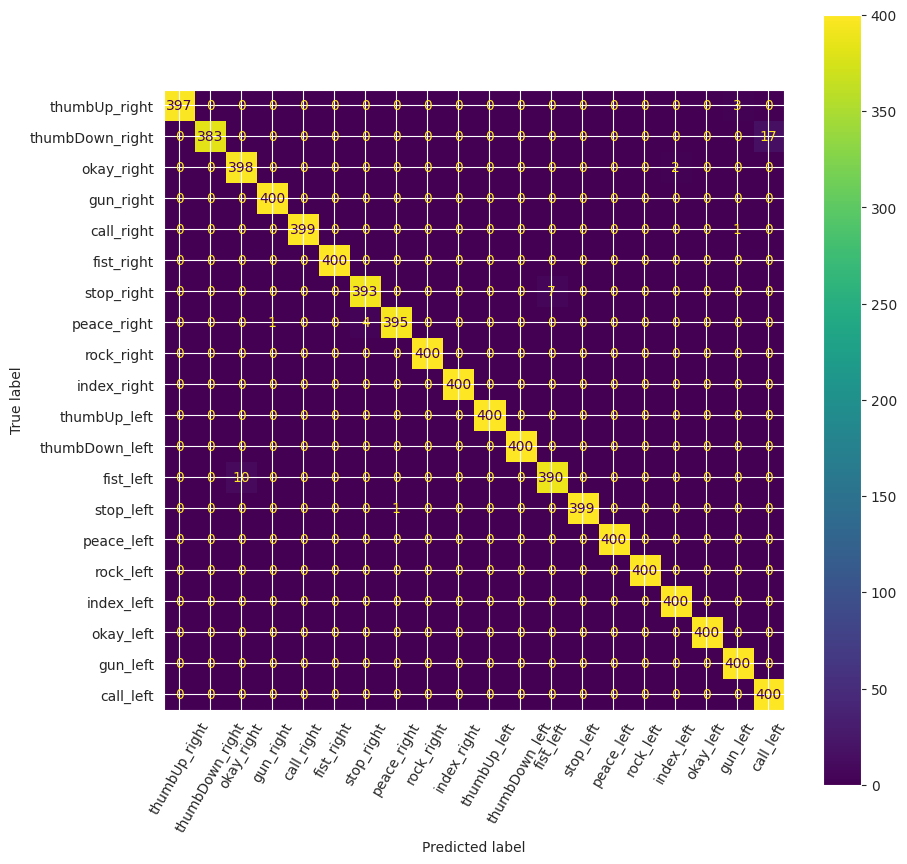

In [21]:
from sklearn.svm import SVC

model = SVC()
classifier_comparison[str(model)] = create_classifier(model)
display_confusion_matrix(classifier_comparison[str(model)]['confusion_matrix'], 'cf_'+str(model))

## Comparison between Models

In [64]:
for c, val in zip(classifier_comparison.keys(), classifier_comparison):
  print(c, classifier_comparison[val]['accuracy_avg'],  classifier_comparison[val]['df_avg']['weighted avg']['precision'],  classifier_comparison[val]['df_avg']['weighted avg']['recall'], classifier_comparison[val]['df_avg']['weighted avg']['f1-score'])

GaussianNB() 0.990325 0.9909032549626404 0.990325 0.9902765732859447
DecisionTreeClassifier(random_state=0) 0.9580500000000001 0.964639997559577 0.9580500000000001 0.9566437069013652
RandomForestClassifier(n_estimators=14, random_state=0) 0.9842749999999999 0.9862985835816742 0.984275 0.9840104595164638
KNeighborsClassifier(n_neighbors=4) 0.9904250000000001 0.9910855462147797 0.9904249999999999 0.9903725846104724
SVC() 0.993675 0.9939531736824682 0.993675 0.993658175705133


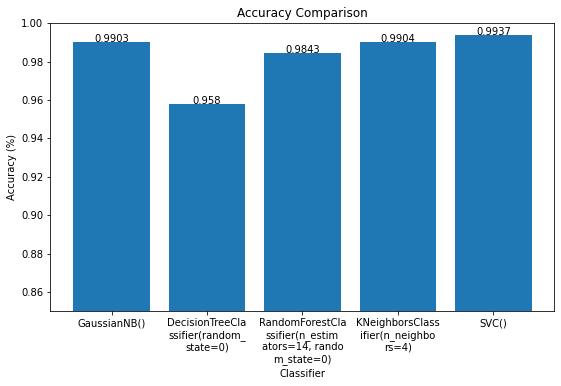

In [67]:
fig = plt.figure(figsize=(7,4))
ax = fig.add_axes([0,0,1,1])

avg_accuracies = [classifier_comparison[x]['accuracy_avg'] for x in classifier_comparison]
ax.bar(classifier_comparison.keys(), avg_accuracies)

plt.xlabel("Classifier")
plt.ylabel("Accuracy (%)")

for i in range(len(classifier_comparison.keys())):
    plt.text(i,avg_accuracies[i], round(avg_accuracies[i],4), ha= 'center')

plt.title('Accuracy Comparison')
#plt.grid()
plt.ylim([0.85, 1])

xticks = [re.sub("(.{15})", "\\1\n", label, 0, re.DOTALL) for label in classifier_comparison.keys()]
plt.xticks(range(len(xticks)), xticks)
filename = "comparison_accuracy_"+str(len(labels))+"_classes.png"
plt.savefig('imgs/'+filename, transparent=True, bbox_inches='tight')
plt.show()

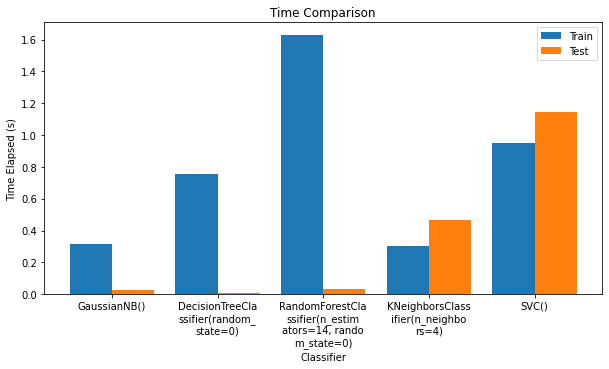

In [66]:
trains = [classifier_comparison[x]['time_elapsed']['train'] for x in classifier_comparison]
tests = [classifier_comparison[x]['time_elapsed']['test'] for x in classifier_comparison]
  
X_axis = np.arange(len(classifier_comparison))

plt.figure(figsize=(10,5)) 

plt.bar(X_axis - 0.2, trains, 0.4, label = 'Train')
plt.bar(X_axis + 0.2, tests, 0.4, label = 'Test')
  
xticks = [re.sub("(.{15})", "\\1\n", label, 0, re.DOTALL) for label in classifier_comparison.keys()]
plt.xticks(range(len(xticks)), xticks)

plt.xlabel("Classifier")
plt.ylabel("Time Elapsed (s)")
plt.title('Time Comparison')
plt.legend()
filename = "comparison_time_"+str(len(labels))+"_classes.png"
plt.savefig('documentation/plot/'+filename, transparent=True, bbox_inches='tight')
plt.show()

## Wilcoxon test

In [36]:
from scipy.stats import wilcoxon

rf_accuracies = classifier_comparison['RandomForestClassifier(n_estimators=14, random_state=0)']['accuracies']
gaussian_accuracies = classifier_comparison['GaussianNB()']['accuracies']

print(wilcoxon(rf_accuracies, gaussian_accuracies))

WilcoxonResult(statistic=7.0, pvalue=1.0)


The Wilcoxon test doesn't allow us to prefer one model over the other, so we choose the Gaussian Naive Bayesian as we deem it the simplest one between the two.